             species microhabitat    SVL  leg.length  pr.mass  \
0    Acris crepitans  terrestrial  17.81       32.40    0.451   
1    Acris crepitans  terrestrial  18.57       36.15    0.495   
2    Acris crepitans  terrestrial  18.82       34.62    0.502   
3    Acris crepitans  terrestrial  19.32       36.80    0.556   
4    Acris crepitans  terrestrial  17.60       33.55    0.431   
..               ...          ...    ...         ...      ...   
894   Xenopus wittei      aquatic  39.67       49.01    5.825   
895   Xenopus wittei      aquatic  39.97       55.34    5.594   
896   Xenopus wittei      aquatic  37.43       50.69    4.405   
897   Xenopus wittei      aquatic  39.35       53.20    5.358   
898   Xenopus wittei      aquatic  40.62       55.63    6.208   

     pr.leg.muscle.mass  
0                 0.074  
1                 0.088  
2                 0.086  
3                 0.102  
4                 0.070  
..                  ...  
894               1.032  
895        

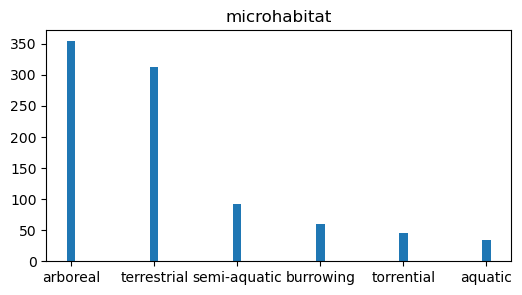

In [39]:
import pandas as pd
df = pd.read_excel("/Users/nigelk.anderson/Desktop/Moen.AmNat.rawdata.xlsx",sheet_name='Moen.AmNat.rawdata', engine='openpyxl')
dfdropcolumn = df.dropna(axis = 1)
dfdropcolumn = dfdropcolumn.drop(["specimen.tag", "study"], axis=1)

print(dfdropcolumn)

dfdropcolumn.info(verbose = True)
print(dfdropcolumn.dtypes)

print(dfdropcolumn['microhabitat'].describe())

import matplotlib
from matplotlib import pylab as plt

print(dfdropcolumn['microhabitat'].value_counts())


plt.figure(figsize=(6,3))
barplot = dfdropcolumn['microhabitat'].value_counts().plot(kind='bar', rot = 0, width = 0.1, subplots = True)



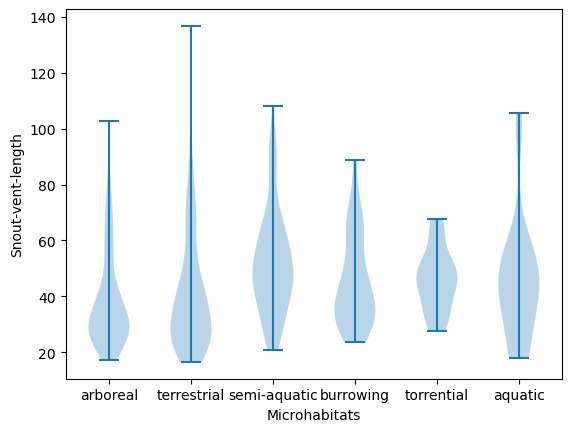

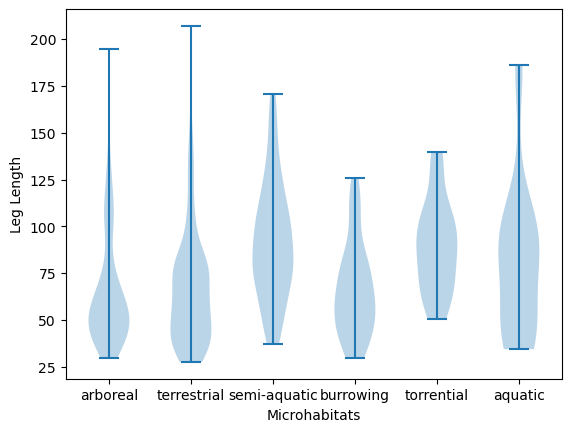

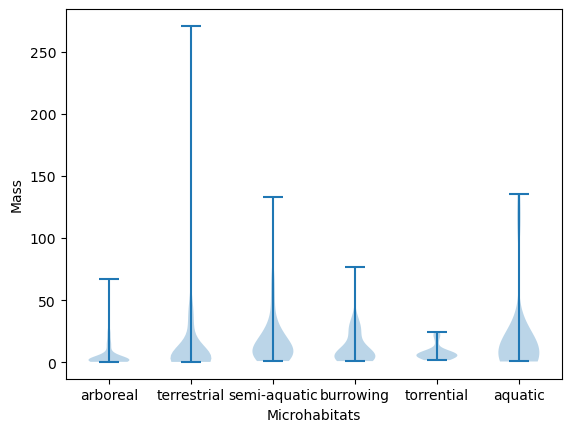

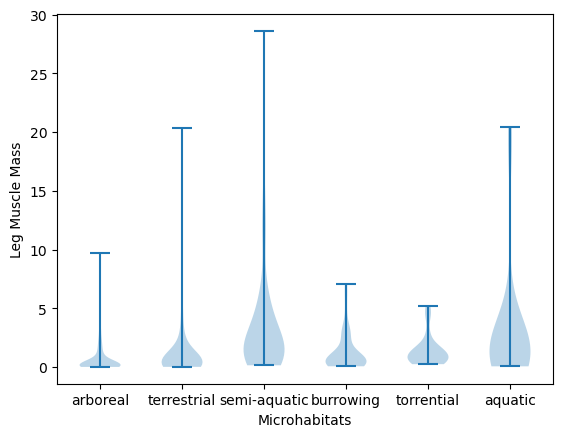

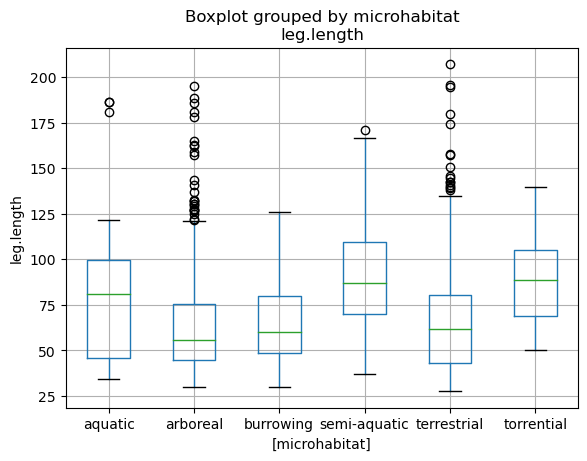

In [40]:
dataset = [dfdropcolumn[dfdropcolumn['microhabitat']=='arboreal']['SVL'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='terrestrial']['SVL'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='semi-aquatic']['SVL'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='burrowing']['SVL'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='torrential']['SVL'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='aquatic']['SVL'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4, 5, 6],['arboreal','terrestrial', 'semi-aquatic','burrowing','torrential','aquatic'])
plt.ylabel('Snout-vent-length')
plt.xlabel('Microhabitats')
plt.show()

dataset = [dfdropcolumn[dfdropcolumn['microhabitat']=='arboreal']['leg.length'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='terrestrial']['leg.length'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='semi-aquatic']['leg.length'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='burrowing']['leg.length'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='torrential']['leg.length'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='aquatic']['leg.length'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4, 5, 6],['arboreal','terrestrial', 'semi-aquatic','burrowing','torrential','aquatic'])
plt.ylabel('Leg Length')
plt.xlabel('Microhabitats')
plt.show()

dataset = [dfdropcolumn[dfdropcolumn['microhabitat']=='arboreal']['pr.mass'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='terrestrial']['pr.mass'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='semi-aquatic']['pr.mass'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='burrowing']['pr.mass'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='torrential']['pr.mass'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='aquatic']['pr.mass'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4, 5, 6],['arboreal','terrestrial', 'semi-aquatic','burrowing','torrential','aquatic'])
plt.ylabel('Mass')
plt.xlabel('Microhabitats')
plt.show()

dataset = [dfdropcolumn[dfdropcolumn['microhabitat']=='arboreal']['pr.leg.muscle.mass'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='terrestrial']['pr.leg.muscle.mass'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='semi-aquatic']['pr.leg.muscle.mass'].values,
          dfdropcolumn[dfdropcolumn['microhabitat']=='burrowing']['pr.leg.muscle.mass'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='torrential']['pr.leg.muscle.mass'].values,
           dfdropcolumn[dfdropcolumn['microhabitat']=='aquatic']['pr.leg.muscle.mass'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4, 5, 6],['arboreal','terrestrial', 'semi-aquatic','burrowing','torrential','aquatic'])
plt.ylabel('Leg Muscle Mass')
plt.xlabel('Microhabitats')
plt.show()

df[['microhabitat','leg.length']].boxplot(by='microhabitat')
plt.ylabel('leg.length')
plt.show()

In [55]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit


y = dfdropcolumn['microhabitat']
groups = dfdropcolumn['species']
X = dfdropcolumn.loc[:, dfdropcolumn.columns != 'microhabitat'] 
print(y)
print(X.head())
classes, counts = np.unique(y,return_counts=True)
print(classes, counts)
print('balance:',np.max(counts/len(y)))

n_splits=5
random_state=42
train_size=0.6
val_size=0.2
test_size=0.2

gss = GroupShuffleSplit(n_splits=n_splits, train_size=train_size, random_state=random_state)
gss2 = GroupShuffleSplit(n_splits=n_splits, train_size=0.5, random_state=random_state)
for train_idx, other_idx in gss.split(X, y, groups):
    X_other, y_other, groups_other = X.iloc[other_idx], y.iloc[other_idx], groups.iloc[other_idx]
    X_train, y_train, groups_train = X.iloc[train_idx], y.iloc[train_idx], groups.iloc[train_idx]
    print("TRAIN:", len(train_idx), "Other:", len(other_idx))
        
    for val_idx, test_idx in gss2.split(X_other, y_other, groups_other):
        X_val, y_val, groups_val = X.iloc[val_idx], y.iloc[val_idx], groups.iloc[val_idx]
        X_test, y_test, groups_test = X.iloc[test_idx], y.iloc[test_idx], groups.iloc[test_idx]
        print("Validation:", len(val_idx), "Test:", len(test_idx))




minmax_ftrs = ['SVL', 'leg.length', 'pr.mass', 'pr.leg.muscle.mass']
scaler = MinMaxScaler()
scaler.fit(X_train[minmax_ftrs])
X_train_prep = scaler.transform(X_train[minmax_ftrs])
X_val_prep = scaler.transform(X_val[minmax_ftrs]) 
X_test_prep = scaler.transform(X_test[minmax_ftrs])
print(X_train.shape)
print(X_train_prep.shape)




0      terrestrial
1      terrestrial
2      terrestrial
3      terrestrial
4      terrestrial
          ...     
894        aquatic
895        aquatic
896        aquatic
897        aquatic
898        aquatic
Name: microhabitat, Length: 899, dtype: object
           species    SVL  leg.length  pr.mass  pr.leg.muscle.mass
0  Acris crepitans  17.81       32.40    0.451               0.074
1  Acris crepitans  18.57       36.15    0.495               0.088
2  Acris crepitans  18.82       34.62    0.502               0.086
3  Acris crepitans  19.32       36.80    0.556               0.102
4  Acris crepitans  17.60       33.55    0.431               0.070
['aquatic' 'arboreal' 'burrowing' 'semi-aquatic' 'terrestrial'
 'torrential'] [ 35 354  60  92 312  46]
balance: 0.39377085650723026
TRAIN: 542 Other: 357
Validation: 180 Test: 177
Validation: 170 Test: 187
Validation: 171 Test: 186
Validation: 175 Test: 182
Validation: 180 Test: 177
TRAIN: 526 Other: 373
Validation: 190 Test: 183
Validatio